# Numerical predictions with a polynomial model: A simple example

Consider the following cubic model:

$\begin{equation}
f(x) = -2-\frac{3}{2}x+\frac{3}{4}x^2+\frac{1}{4}x^3
\end{equation}$

Assume that this model is used to predict the value of a label $y$ given a predictor $x$, i.e. assume $\hat{y} = f(x)$. Let's use Python to calculate our model's prediction for three values of $x$, say $x=0, 1, 2$. We will start by implementing a **non-vectorised** approach:

In [1]:
y_0 = -2 - 0*3/2 + 0**2*3/4 + 0**3*1/4
print("The prediction for x=0 is:", y_0)
y_1 = -2 - 1*3/2 + 1**2*3/4 + 1**3*1/4
print("The prediction for x=1 is:", y_1)
y_2 = -2 - 2*3/2 + 2**2*3/4 + 2**3*1/4
print("The prediction for x=2 is:", y_2)

The prediction for x=0 is: -2.0
The prediction for x=1 is: -2.5
The prediction for x=2 is: 0.0


We have written down one line of code per prediction. When we have many predictions to make, writing a line of code per prediction is less than ideal. Using loops might seem like a good option that avoids writing many repetitive lines of code:

In [2]:
for x in [0, 1, 2]:
  y = -2 - x*3/2 + x**2*3/4 + x**3*1/4
  print("The prediction for x=", x ,"is:", y)

The prediction for x= 0 is: -2.0
The prediction for x= 1 is: -2.5
The prediction for x= 2 is: 0.0


However this approach is still **computationally inefficient**, as it proceeds by computing one prediction at a time. The most efficient approach is to take advantage of **vectorised operations**, where collections of values are operated on at the same time. 

The first step is to import NumPy:

In [3]:
import numpy as np
np.set_printoptions(precision=3) # We do this to print up to 3 decimal places 

We can now apply the model $f(x)$ to a NumPy array consisting of the predictor values $x=0, 1, 2$:

In [5]:
x = np.array([[0],[1],[2]]) # x is a 1x3 column vector: 1 column and 3 rows
print("The predictors x are\n", x)
print("The square of x is\n", x**2)
print("The cube of x is\n", x**3)
y = -2 - x*3/2 + x**2*3/4 + x**3*1/4
print("The predicted labels are:\n", y)

The predictors x are
 [[0]
 [1]
 [2]]
The square of x is
 [[0]
 [1]
 [4]]
The cube of x is
 [[0]
 [1]
 [8]]
The predicted labels are:
 [[-2. ]
 [-2.5]
 [ 0. ]]


We have not just reduced the number of lines of code (which is great, by the way). The line of code `y = -2 - x*3/2 + x**2*3/4 + x**3*1/4` operates on a NumPy array of dimensions 1x3, rather than operating 3 times on different values. Importantly, the NumPy array `x` can be of any size. In the following cell we create a vector `x` consisting of 100 values between -4 and 4 and use exactly the same line of code as above to obtain the corresponding predictions: 

In [6]:
x = np.linspace(-4,4, 100)  # linspace returns a vector from -4 to 4 divided into 100 parts
print("The predictors x are:", x)
y = -2-x*3/2+x**2*3/4+x**3*1/4
print("The predicted labels are:", y)

The predictors x are: [-4.    -3.919 -3.838 -3.758 -3.677 -3.596 -3.515 -3.434 -3.354 -3.273
 -3.192 -3.111 -3.03  -2.949 -2.869 -2.788 -2.707 -2.626 -2.545 -2.465
 -2.384 -2.303 -2.222 -2.141 -2.061 -1.98  -1.899 -1.818 -1.737 -1.657
 -1.576 -1.495 -1.414 -1.333 -1.253 -1.172 -1.091 -1.01  -0.929 -0.848
 -0.768 -0.687 -0.606 -0.525 -0.444 -0.364 -0.283 -0.202 -0.121 -0.04
  0.04   0.121  0.202  0.283  0.364  0.444  0.525  0.606  0.687  0.768
  0.848  0.929  1.01   1.091  1.172  1.253  1.333  1.414  1.495  1.576
  1.657  1.737  1.818  1.899  1.98   2.061  2.141  2.222  2.303  2.384
  2.465  2.545  2.626  2.707  2.788  2.869  2.949  3.03   3.111  3.192
  3.273  3.354  3.434  3.515  3.596  3.677  3.758  3.838  3.919  4.   ]
The predicted labels are: [ 0.     0.349  0.67   0.962  1.228  1.467  1.681  1.871  2.036  2.179
  2.299  2.398  2.476  2.534  2.573  2.594  2.597  2.584  2.554  2.51
  2.451  2.379  2.294  2.196  2.088  1.969  1.841  1.704  1.559  1.407
  1.248  1.083  0.914  0.741  

No matter what the size of `x` is, the code that we need to write is exactly the same. Printing all the values is **not a good idea**, though (after all, **who's going to read them**?). It is much more informative to plot the label `y` against the predictor `x`:

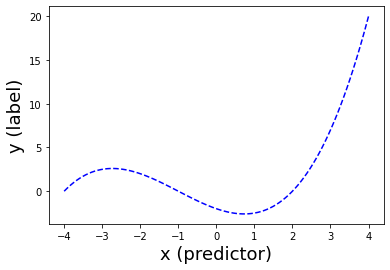

In [7]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'b--') #b is a code for blue and -- is for dashed line. . and - is for dotted line and normal line
plt.xlabel("x (predictor)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.show()